# DSSATTools Perennial forage example notebook

Simulating perennial forages implicates creating extra input files, and dealing with extra output files as well. As there are extra files in DSSAT for this kind of crops, DSSATTools also has different classes to represent those extra files. You must have gone through the first example notebook (Basics). 

As an example, we will be recreating the Experiment AGZG1501, Treatment 1.

In [1]:
from DSSATTools import (
    crop, # module that contains the classes for the different crops.
    WeatherStation, # class needed to define the Weather. 
    SoilProfile, SoilLayer, # classes that define the entire soil profile, and the soil layers within the soil profile
    filex, # module that contains the clases for the FileX sections.
    DSSAT # the simulation environment class.
)
from DSSATTools.filex import IrrigationEvent, FertilizerEvent, MowEvent # Individual events
import pandas as pd
from datetime import datetime
import tempfile
import os

/home/diego/DSSATTools_notebooks/venv/lib/python3.10/site-packages/DSSATTools/__init__.py:105: DeprecationWarning: DSSATTools version 3.0.0 is a major upgrade and will not be backwards compatible with previous versions. If you are running code that was developed  using a previous DSSATTools version, then install DSSATTools version 2.1.6
  warnings.warn(


**Weather**

We will create the weather from a DataFrame with the DSSAT Weather files for this experiment.

In [2]:
# Create DataFrame from DSSAT Weather files
df = []
for year in range(15, 18):
    df.append(pd.read_fwf(
        f'https://github.com/DSSAT/dssat-csm-data/blob/develop/Weather/TARD{year}01.WTH?raw=true',
        skiprows=4, colspecs=[(6*i, 6*i+5) for i in range(10)]
    ))
df = pd.concat(df, ignore_index=True)
df.columns = [
    'date', 'srad', 'tmax', 'tmin', 'rain', 'dewp',
    'wind', 'par', 'evap', 'rhum'
]
df["date"] = pd.to_datetime(df.date, format='%y%j')
df.head()

# Create weather station using the DataFrame
weather_station = WeatherStation(
    insi='TARD', lat=33.3, long=-84.3, elev=300, tav=14.3, amp=18.2, 
    table=df
)
weather_station

WeatherStation(insi='TARD', lat=33.3, long=-84.3, elev=300.0, tav=14.3, amp=18.2, refht=nan, wndht=nan, cco2=nan, table=
   DATE  SRAD  TMAX  TMIN  RAIN  DEWP  WIND   PAR  EVAP  RHUM 
2015001   8.8  10.7  -7.1   0.0   -99  53.6   -99   0.5  75.3
2015002   8.2  11.1  -6.7   0.0   -99  40.6   -99   0.4  81.4
2015003   8.6  15.5  -4.0   0.0   -99  93.3   -99   1.0  64.7
2015004   8.9  16.0  -0.6   0.0   -99 189.2   -99   1.2  76.4
2015005   4.7   7.3  -2.9   0.1   -99  52.7   -99   0.3  99.3
2015006   2.5   6.5   0.0   0.0   -99  98.5   -99   0.3 100.0
...
...)

**Soil**

The soil file will created from the DSSAT Soil file.

In [3]:
# Download and save the DSSAT Soil file 
import urllib.request
response = urllib.request.urlopen('https://github.com/DSSAT/dssat-csm-data/blob/develop/Soil/AG.SOL?raw=true')
soil_file_str = ''.join([l.decode('utf-8') for l in response])
with open('AG.SOL', 'w') as f:
    f.write(soil_file_str)
soil = SoilProfile.from_file('AGSP209115', 'AG.SOL')
soil

SoilProfile(name='AGSP209115', soil_data_source='EUROFINS', soil_clasification='SIC', soil_depth=120.0, soil_series_name='ALFALFA, HYDRANT 209b', site='LA VIOLADA', country='SPAIN', lat=41.0, long=0.0, scs_family='PETROCALCIC CALCIXEREPT', scom='G', salb=0.13, slu1=6.0, sldr=0.6, slro=73.0, slnf=1.0, slpf=1.0, smhb='IB001', smpx='IB001', smke='IB001', table=
  SLB SLMH   SLLL  SDUL  SSAT  SRGF  SSKS  SBDM  SLOC  SLCL  SLSI  SLCF  SLNI  SLHW  SLHB  SCEC  SADC  SLPX  SLPT  SLPO CACO3  SLAL  SLFE  SLMN  SLBS  SLPA  SLPB  SLKE  SLMG  SLNA  SLSU  SLEC  SLCA 
   30 -99   0.117 0.433 0.497 1.000  0.09  1.50  1.80  42.9  51.0   -99   -99   8.0   -99  16.0   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99
   60 -99   0.220 0.449 0.553 0.407  0.68  1.50  0.50   6.4  70.0   -99   -99   8.0   -99  13.0   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99
   90 -99   0.219 0.470 0.507 0.223  0.68  1

**Cultivar**

In [4]:
cultivar = crop.Alfalfa('AL0001')
cultivar

CropPars(vrname='Aragon  FD7', expno='', eco#=CropPars(econame='Aragon FD7', mg='00', tm='01', thvar=1.0, pl-em=0.0, em-v1=0.0, v1-ju=0.0, ju-r0=9999.0, pm06=0.0, pm09=0.75, lngsh=10.0, r7-r8=9999.0, fl-vs=9999.0, trifl=0.25, rwdth=1.0, rhght=1.0, r1ppo=0.0, optbi=0.0, slobi=0.0, rdrmt=0.421, rdrmg=1.0, rdrmm=0.85, rchdp=1.0), csdl=12.5, ppsen=0.2, em-fl=99.0, fl-sh=10.0, fl-sd=18.0, sd-pm=33.0, fl-lf=25.0, lfmax=1.4, slavr=240.0, sizlf=2.0, xfrt=0.01, wtpsd=0.02, sfdur=15.0, sdpdv=2.05, podur=20.0, thrsh=78.0, sdpro=0.115, sdlip=0.035)

**FileX (Management and Options)**

In this case we will create all the FileX sections using the class for each section.

In [5]:
field = filex.Field(
    id_field='AGZA1501', wsta=weather_station, id_soil=soil, 
    flname='IRRIGATED, 63 kg N/ha (2015-2017)', xcrd=42.0, ycrd=0.0, elev=222.0
)
# Planting section
planting = filex.Planting(
    pdate=datetime(2015, 9, 20), ppop=400.0, ppoe=400.0, plme='S', plds='R', 
    plrs=10.0, plrd=0.0, pldp=2.0, plwt=2000.0, page=150.0, penv=32.0, 
    plph=1.0, sprl=0.0, plname='209'
)
# Fertilizer section
fertilizer = filex.Fertilizer(
    table=[    
        FertilizerEvent(
            fdate=datetime(2016, 4, 28), fmcd='FE001', facd='AP001', fdep=1.0, 
            famn=63.0, famp=162.0, fername='209a-b'
        )
    ]
)
# Harvest section
harvest = filex.Harvest(hdate=datetime(2017, 4, 30), hstg='GS000', hcom='C', hsize='A')
# Simulation controls
simulation_controls = filex.SimulationControls(
    general=filex.SCGeneral(nyers=1.0, nreps=1.0, start='P', sdate=datetime(2015, 1, 1)),
    options=filex.SCOptions(
        water='Y', nitro='Y', symbi='Y', phosp='N', potas='N', 
        dises='N', chem='N', till='Y', co2='M'
    ),
    methods=filex.SCMethods(
        wther='M', incon='M', light='E', evapo='F', infil='S', photo='L', 
        hydro='R', nswit='0', mesom='P', mesev='R', mesol='2'
    ),
    management=filex.SCManagement(plant='R', irrig='R', ferti='R', resid='R', harvs='R'),
)

This particular experiment has several irrigation events: 

In [6]:
irrigation = filex.Irrigation(
    efir=1.0, idep=30.0, ithr=50.0, iept=100.0, ioff='GS000', iame='IR001', 
    iamt=10.0, irname='209-a-b',
    table = [
        IrrigationEvent(idate=datetime(2016, 4, 27), irop='IR004', irval=17.2),
        IrrigationEvent(idate=datetime(2016, 4, 28), irop='IR004', irval=10.6),
        IrrigationEvent(idate=datetime(2016, 5, 2), irop='IR004', irval=3.5),
        IrrigationEvent(idate=datetime(2016, 5, 4), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 5, 6), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 5, 7), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 5, 14), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 5, 16), irop='IR004', irval=3.9),
        IrrigationEvent(idate=datetime(2016, 5, 18), irop='IR004', irval=3.9),
        IrrigationEvent(idate=datetime(2016, 5, 20), irop='IR004', irval=3.9),
        IrrigationEvent(idate=datetime(2016, 5, 21), irop='IR004', irval=3.9),
        IrrigationEvent(idate=datetime(2016, 5, 23), irop='IR004', irval=3.9),
        IrrigationEvent(idate=datetime(2016, 5, 25), irop='IR004', irval=11.5),
        IrrigationEvent(idate=datetime(2016, 5, 27), irop='IR004', irval=8.6),
        IrrigationEvent(idate=datetime(2016, 5, 28), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 5, 30), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 6, 1), irop='IR004', irval=11.6),
        IrrigationEvent(idate=datetime(2016, 6, 3), irop='IR004', irval=11.7),
        IrrigationEvent(idate=datetime(2016, 6, 4), irop='IR004', irval=4.8),
        IrrigationEvent(idate=datetime(2016, 6, 13), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 6, 15), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 6, 16), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 6, 17), irop='IR004', irval=6.3),
        IrrigationEvent(idate=datetime(2016, 6, 18), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 6, 19), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 6, 20), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 6, 21), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 6, 22), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 6, 23), irop='IR004', irval=5.0),
        IrrigationEvent(idate=datetime(2016, 6, 24), irop='IR004', irval=17.5),
        IrrigationEvent(idate=datetime(2016, 6, 25), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 6, 26), irop='IR004', irval=11.6),
        IrrigationEvent(idate=datetime(2016, 6, 28), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 6, 29), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 6, 30), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 7, 1), irop='IR004', irval=5.7),
        IrrigationEvent(idate=datetime(2016, 7, 2), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 7, 3), irop='IR004', irval=11.4),
        IrrigationEvent(idate=datetime(2016, 7, 5), irop='IR004', irval=5.2),
        IrrigationEvent(idate=datetime(2016, 7, 6), irop='IR004', irval=12.8),
        IrrigationEvent(idate=datetime(2016, 7, 14), irop='IR004', irval=14.5),
        IrrigationEvent(idate=datetime(2016, 7, 16), irop='IR004', irval=8.0),
        IrrigationEvent(idate=datetime(2016, 7, 17), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 7, 19), irop='IR004', irval=8.0),
        IrrigationEvent(idate=datetime(2016, 7, 20), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 7, 21), irop='IR004', irval=37.9),
        IrrigationEvent(idate=datetime(2016, 7, 22), irop='IR004', irval=14.4),
        IrrigationEvent(idate=datetime(2016, 7, 23), irop='IR004', irval=7.9),
        IrrigationEvent(idate=datetime(2016, 7, 24), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 7, 24), irop='IR004', irval=43.6),
        IrrigationEvent(idate=datetime(2016, 7, 27), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 7, 28), irop='IR004', irval=7.9),
        IrrigationEvent(idate=datetime(2016, 7, 29), irop='IR004', irval=6.4),
        IrrigationEvent(idate=datetime(2016, 7, 30), irop='IR004', irval=38.3),
        IrrigationEvent(idate=datetime(2016, 7, 31), irop='IR004', irval=14.3),
        IrrigationEvent(idate=datetime(2016, 8, 2), irop='IR004', irval=8.0),
        IrrigationEvent(idate=datetime(2016, 8, 3), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 8, 4), irop='IR004', irval=38.6),
        IrrigationEvent(idate=datetime(2016, 8, 5), irop='IR004', irval=7.9),
        IrrigationEvent(idate=datetime(2016, 8, 6), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 8, 7), irop='IR004', irval=14.5),
        IrrigationEvent(idate=datetime(2016, 8, 17), irop='IR004', irval=8.0),
        IrrigationEvent(idate=datetime(2016, 8, 18), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 8, 19), irop='IR004', irval=14.4),
        IrrigationEvent(idate=datetime(2016, 8, 20), irop='IR004', irval=7.9),
        IrrigationEvent(idate=datetime(2016, 8, 22), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 8, 23), irop='IR004', irval=14.4),
        IrrigationEvent(idate=datetime(2016, 8, 24), irop='IR004', irval=7.9),
        IrrigationEvent(idate=datetime(2016, 8, 25), irop='IR004', irval=6.5),
        IrrigationEvent(idate=datetime(2016, 8, 26), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 8, 27), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 8, 29), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 8, 30), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 8, 31), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 1), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 2), irop='IR004', irval=5.7),
        IrrigationEvent(idate=datetime(2016, 9, 3), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 5), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 6), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 7), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 8), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 9), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 10), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 11), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 13), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 20), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 9, 27), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 10, 4), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 10, 11), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 10, 15), irop='IR004', irval=5.8),
        IrrigationEvent(idate=datetime(2016, 10, 20), irop='IR004', irval=5.8)
    ]
)
irrigation

Irrigation(efir=1.0, idep=30.0, ithr=50.0, iept=100.0, ioff='GS000', iame='IR001', iamt=10.0, irname='209-a-b', table=
IDATE  IROP IRVAL 
16118 IR004  17.2
16119 IR004  10.6
16123 IR004   3.5
16125 IR004   5.8
16127 IR004   5.8
16128 IR004   5.8
...
...)

**Mow**

The Mow section can be read from a file using the `Mow.from_file` class function. This function will return a dictionary containing the Mow classes for the different treatments in that Mow file:

In [7]:
response = urllib.request.urlopen('https://github.com/DSSAT/dssat-csm-data/blob/develop/Alfalfa/AGZG1501.MOW?raw=true')
soil_file_str = ''.join([l.decode('utf-8') for l in response])
with open('AGZG1501.MOW', 'w') as f:
    f.write(soil_file_str)

mow_treatments = filex.Mow.from_file('AGZG1501.MOW')
mow = mow_treatments[1]
mow

Mow(, table=
 DATE   MOW RSPLF   MVS  RSHT 
16116  1000    20     2   5.0
16146  1000    20     2   5.0
16188  1000    20     2   5.0
16215  1000    20     2   5.0
16250  1000    20     2   5.0
16312  1000    20     2   5.0
...
...)

We can also create the Mow section defining one event at a time:

In [8]:
mow = filex.Mow(
    table=[
        MowEvent(date=datetime(2016, 4, 25), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2016, 5, 25), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2016, 7, 6), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2016, 8, 2), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2016, 9, 6), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2016, 11, 7), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2017, 4, 12), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0),
        MowEvent(date=datetime(2017, 5, 23), mow=1000.0, rsplf=20.0, mvs=2.0, rsht=5.0)
    ]
)
mow

Mow(, table=
 DATE   MOW RSPLF   MVS  RSHT 
16116  1000    20     2   5.0
16146  1000    20     2   5.0
16188  1000    20     2   5.0
16215  1000    20     2   5.0
16250  1000    20     2   5.0
16312  1000    20     2   5.0
...
...)

**Running a single treatment**

Now we can run the model as we did in the first notebook, with one key difference: in this case we also need to pass a Mow object:

In [9]:
TMP = tempfile.tempdir
dssat = DSSAT(os.path.join(TMP, 'dssat_test'))
results = dssat.run_treatment(
    field=field, cultivar=cultivar, planting=planting,
    irrigation=irrigation, fertilizer=fertilizer,
    harvest=harvest, simulation_controls=simulation_controls,
    mow=mow
)

/tmp/dssat_test created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 AL   1 -99 -99   -99 29612   555   793  1538     8   -99     8  21013  157


**Check output**

We can now check the output in the FORAGE.OUT file:

In [10]:
print(dssat.output_files['FORAGE'])

*Forage Model Harvest Output:         AL  DSSAT Cropping System Model Ver. 4.8.2.000      -HEAD    APR 13, 2025; 13:27:59

@RUN FILEX    CR TRNO FHNO YEAR DOY RCWAH RLWAH RSWAH RSRWH RRTWH RLAIH FHWAH FHNAH FHN%H FHC%H FHLGH FHL%H  MOWC RSPLC
   1          AL    1    1 2016 116  1000   200   800  1634  3245  0.31  2151    64  2.96  5.05  6.57  64.4    0.   0.0
   1          AL    1    2 2016 146  1000   200   800  2152  3773  0.38  3341   131  3.93  4.77  6.24  68.7    0.   0.0
   1          AL    1    3 2016 188  1000   200   800  3102  4618  0.53  6303   178  2.82  5.04  7.11  57.2    0.   0.0
   1          AL    1    4 2016 215  1000   200   800  3376  4516  0.54  3555   122  3.44  4.92  6.67  63.0    0.   0.0
   1          AL    1    5 2016 250  1000   200   800  3969  4659  0.57  4099   122  2.99  5.03  6.98  58.9    0.   0.0
   1          AL    1    6 2016 312  1000   200   800  4994  3273  0.49  4104   103  2.51  4.75  7.05  58.0    0.   0.0
   1          AL    1    7 2017 102  

In [11]:
# Make a DataFrame with that file
from io import StringIO
forage = pd.read_fwf(
    StringIO(dssat.output_files['FORAGE']),
    skiprows=1, widths=[4, 6, 6, 5, 5, 5, 4] + [6]*14
)
forage

,@RUN,FILEX,CR,TRNO,FHNO,YEAR,DOY,RCWAH,RLWAH,RSWAH,...,RRTWH,RLAIH,FHWAH,FHNAH,FHN%H,FHC%H,FHLGH,FHL%H,MOWC,RSPLC
0,1,NaN,AL,1,1,2016,116,1000,200,800,...,3245,0.31,2151,64,2.96,5.05,6.57,64.4,0.0,0.0
1,1,NaN,AL,1,2,2016,146,1000,200,800,...,3773,0.38,3341,131,3.93,4.77,6.24,68.7,0.0,0.0
2,1,NaN,AL,1,3,2016,188,1000,200,800,...,4618,0.53,6303,178,2.82,5.04,7.11,57.2,0.0,0.0
3,1,NaN,AL,1,4,2016,215,1000,200,800,...,4516,0.54,3555,122,3.44,4.92,6.67,63.0,0.0,0.0
4,1,NaN,AL,1,5,2016,250,1000,200,800,...,4659,0.57,4099,122,2.99,5.03,6.98,58.9,0.0,0.0
5,1,NaN,AL,1,6,2016,312,1000,200,800,...,3273,0.49,4104,103,2.51,4.75,7.05,58.0,0.0,0.0
6,1,NaN,AL,1,7,2017,102,1000,200,800,...,2851,0.32,6060,161,2.66,5.31,7.31,54.5,0.0,0.0


Text(0, 0.5, 'Forage yield (kg/ha)')

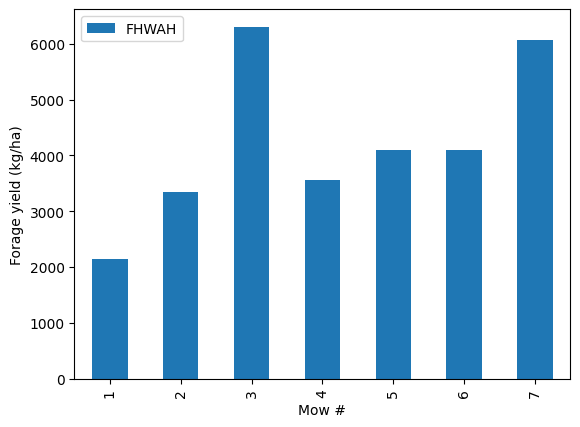

In [12]:
# Plot the different mows
ax = forage.plot.bar(x='FHNO', y='FHWAH')
ax.set_xlabel("Mow #")
ax.set_ylabel("Forage yield (kg/ha)")